In [104]:
from sklearn.linear_model import LinearRegression
import yfinance as yf
import pandas as pd
from datetime import datetime

In [116]:
start_date = '2021-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')
#end_date='2023-12-28'
# Fetch VOO data
msft = yf.Ticker("XLRE")
hist= msft.history(start=start_date, end=end_date).reset_index()
#df_voo['Date']=pd.to_datetime(df_voo['Date']).dt.date


#msft = yf.Ticker("MSFT")
#hist = msft.history(period="12mo")
hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
0,2021-01-04 00:00:00-05:00,32.605610,32.667902,31.475447,31.484348,4967000,0.0,0.0,0.0
1,2021-01-05 00:00:00-05:00,31.502148,31.751316,31.422058,31.448753,4432400,0.0,0.0,0.0
2,2021-01-06 00:00:00-05:00,31.457657,31.497703,31.119500,31.297476,7383400,0.0,0.0,0.0
3,2021-01-07 00:00:00-05:00,31.368658,31.502143,31.159533,31.395353,3433700,0.0,0.0,0.0
4,2021-01-08 00:00:00-05:00,31.475440,31.831398,31.430946,31.733509,3419900,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
920,2024-08-30 00:00:00-04:00,43.340000,43.570000,43.000000,43.549999,5611600,0.0,0.0,0.0
921,2024-09-03 00:00:00-04:00,43.270000,43.860001,43.250000,43.650002,7580900,0.0,0.0,0.0
922,2024-09-04 00:00:00-04:00,43.750000,44.200001,43.525002,43.750000,5855600,0.0,0.0,0.0
923,2024-09-05 00:00:00-04:00,44.080002,44.099998,43.514999,43.630001,5539200,0.0,0.0,0.0


In [114]:
import numpy as np
def donchian(df):
    max_high=df['High'].max()
    min_low=df['Low'].min()
    return (max_high+min_low)/2
def SMA(df):
    return df['Close'].mean()
def Delta(df,donch,sma):
    return df['Close'] - ( (donch + sma) / 2 )
hist=hist.head(241)
hist=hist.dropna(subset='Close')
hist=hist.sort_values(by='Date')
len(hist)
df=hist.iloc[:20].copy()
donch=donchian(df)
sma=SMA(df)
deltas=Delta(df,donch,sma)

lr=LinearRegression()
X=np.array([i for i in range(20)]).reshape(-1,1)
print(len(deltas),len(df),len(X))
lr.fit(X,deltas)
df['values']=lr.predict(X)
list_of_values=[]
metrics=[]
smas=[]
donches=[]
first=True
for i in range(20,len(hist)+1):
    df=hist.iloc[i-20:i]
    donch=donchian(df)
    sma=SMA(df)
    
    deltas=Delta(df,donch,sma)
    lr.fit(X,deltas)
    values=lr.predict(X)
    if first:
        first=False
        list_of_values=np.append(list_of_values,values)   
        metrics+=[(donch+sma)/2 for _ in range(20)]
        smas+=[sma for _ in range(20)]
        donches+=[donch for _ in range(20)]
    else:  
        values=values[-1]
        list_of_values=np.append(list_of_values,values)
        metrics.append((donch+sma)/2)
        smas.append(sma)
        donches.append(donch)
hist['values']=list_of_values
hist.head(10)
hist['metric']=metrics
hist['donch']=donches
hist['sma']=smas


20 20 20


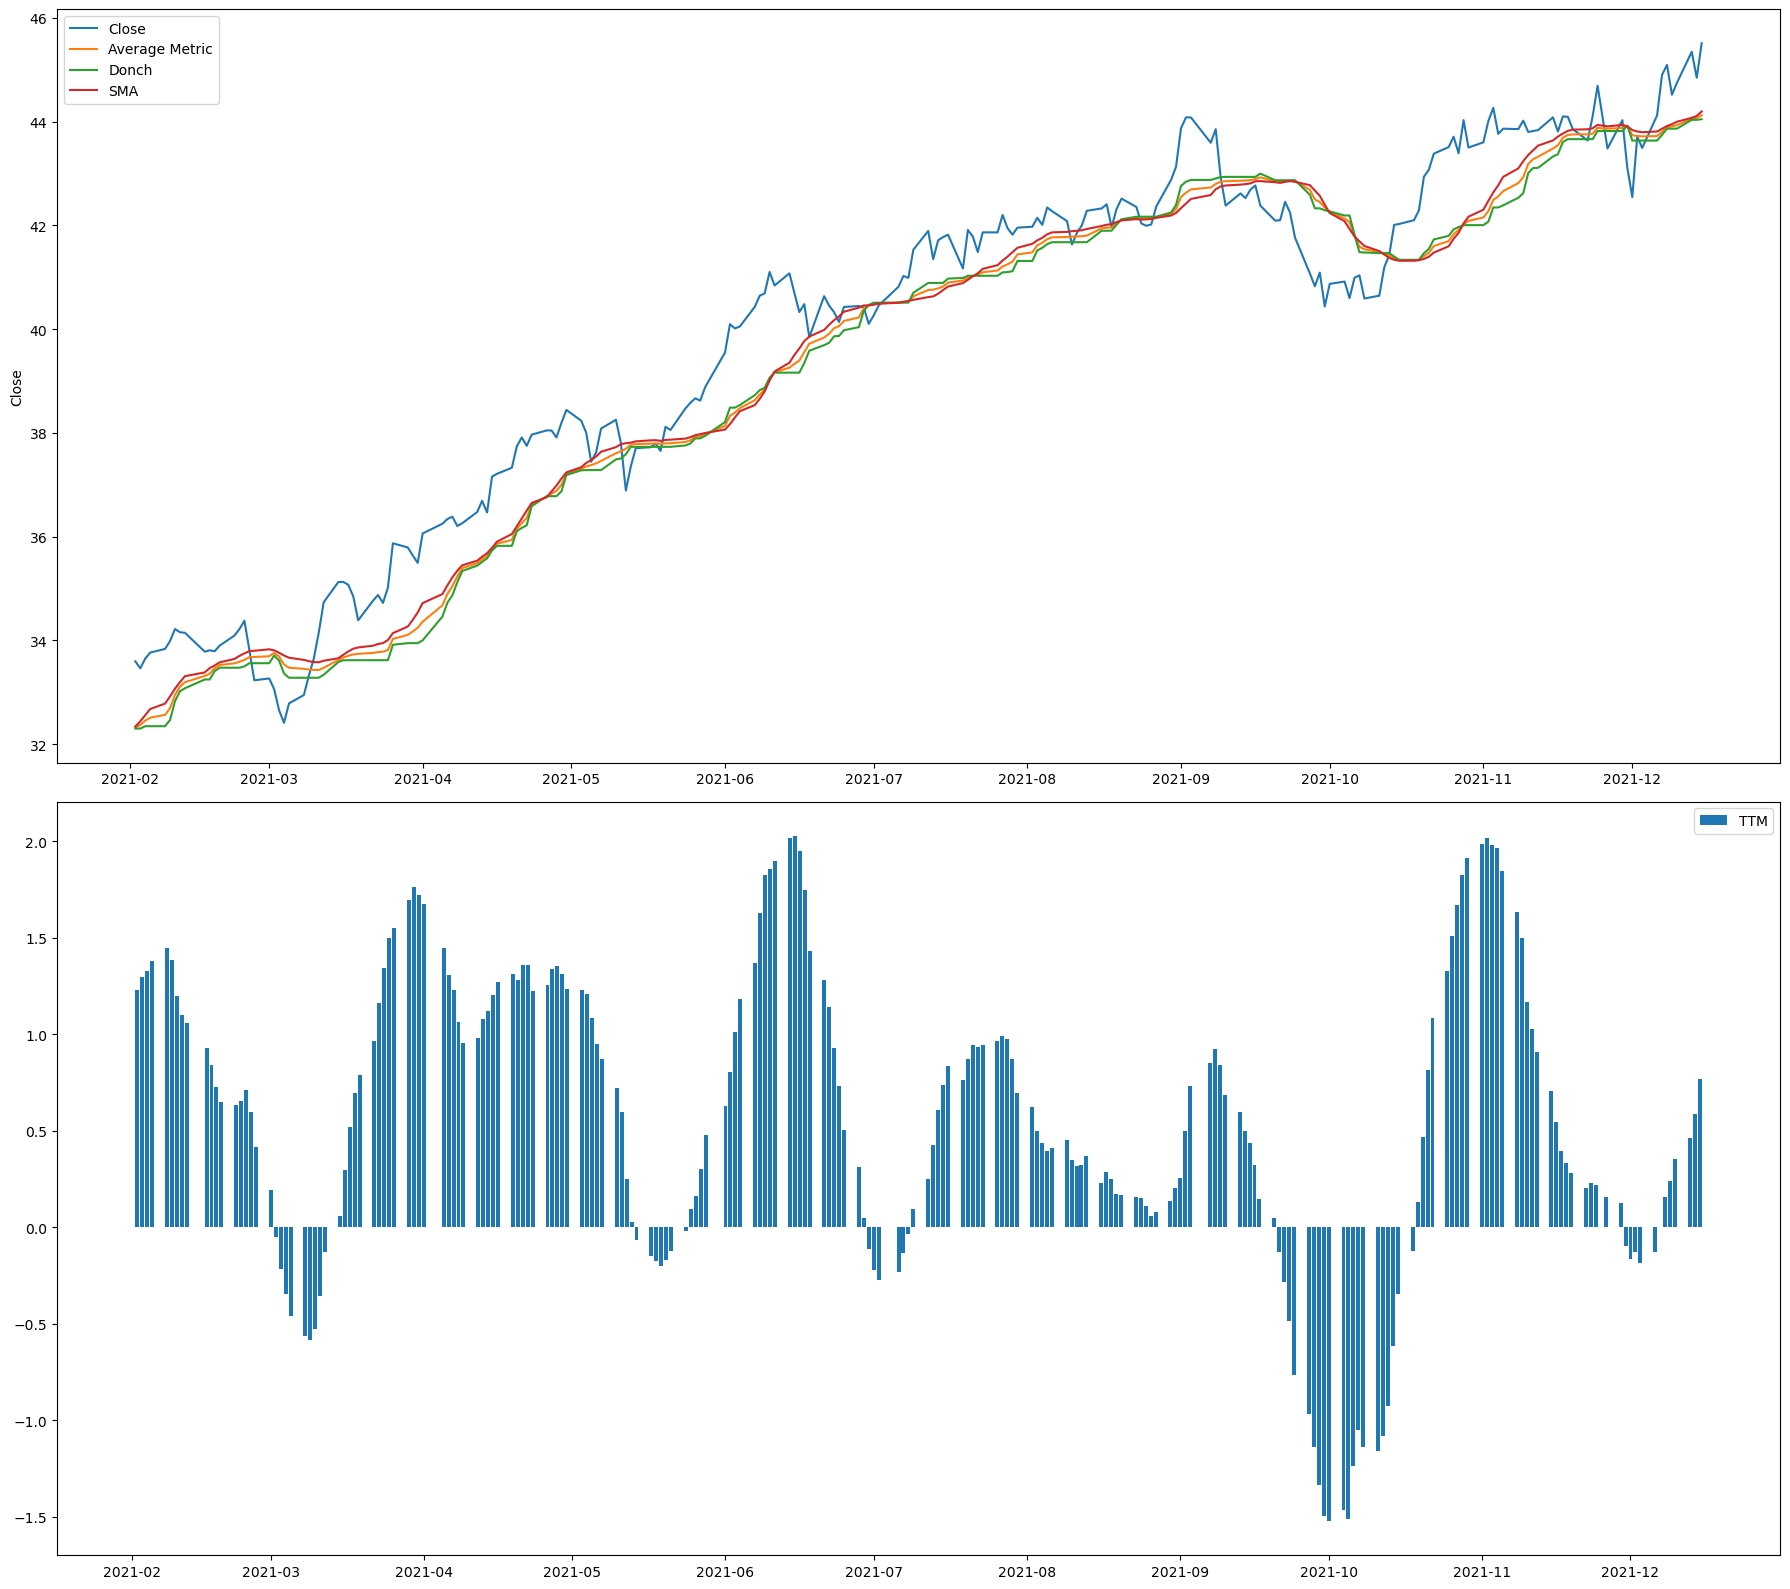

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
hist=hist.reset_index()
hist=hist.iloc[20:]
fig,ax =plt.subplots(2,figsize=(18,16))
ax[1].bar(hist['Date'],hist['values'], label='TTM')
ax[0].set_ylabel('Close')
ax[0].plot(hist['Date'],hist['Close'], label='Close')
ax[0].plot(hist['Date'],hist['metric'],label='Average Metric')
ax[0].plot(hist['Date'],hist['donch'], label='Donch')
ax[0].plot(hist['Date'],hist['sma'],label='SMA')
                
                     
ax[0].legend()
plt.legend()     
plt.tight_layout()
plt.savefig('TTM_Squeeze_msft.png')
plt.show()


In [84]:
hist

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,values,metric,donch,sma
20,20,2021-02-02 00:00:00-05:00,33.620083,33.762466,33.379812,33.593388,3017400,0.0,0.0,0.0,1.230339,32.318176,32.298598,32.337754
21,21,2021-02-03 00:00:00-05:00,33.548899,33.575594,33.006065,33.459908,3472200,0.0,0.0,0.0,1.299560,32.368454,32.298598,32.438311
22,22,2021-02-04 00:00:00-05:00,33.504411,33.851468,33.397621,33.646793,3040200,0.0,0.0,0.0,1.328925,32.449438,32.343099,32.555777
23,23,2021-02-05 00:00:00-05:00,33.744676,33.824766,33.620092,33.762474,2019400,0.0,0.0,0.0,1.377806,32.508616,32.343099,32.674133
24,24,2021-02-08 00:00:00-05:00,33.780265,33.842558,33.539994,33.833660,2590000,0.0,0.0,0.0,1.446580,32.561120,32.343099,32.779141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,236,2021-12-09 00:00:00-05:00,44.991780,45.000879,44.477824,44.518757,3572400,0.0,0.0,0.0,0.240378,43.907240,43.863803,43.950676
237,237,2021-12-10 00:00:00-05:00,44.700692,44.782561,44.466000,44.746174,3683700,0.0,0.0,0.0,0.351681,43.930436,43.863803,43.997069
238,238,2021-12-13 00:00:00-05:00,44.618823,45.551226,44.555147,45.346550,5105600,0.0,0.0,0.0,0.463211,44.053469,44.034366,44.072571
239,239,2021-12-14 00:00:00-05:00,45.246482,45.346542,44.509656,44.846230,8920600,0.0,0.0,0.0,0.588743,44.072571,44.034366,44.110776


In [118]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming 'hist' is your original daily DataFrame
hist['Date'] = pd.to_datetime(hist['Date'])
hist = hist.set_index('Date')

# Resample to weekly frequency
weekly_hist = hist.resample('W').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

weekly_hist = weekly_hist.reset_index()
weekly_hist

,Date,Open,High,Low,Close,Volume
0,2021-01-10 00:00:00-05:00,32.605610,32.667902,31.119500,31.733509,23636400
1,2021-01-17 00:00:00-05:00,31.564440,32.397381,30.834729,32.338650,19452400
2,2021-01-24 00:00:00-05:00,32.498825,32.920633,32.044979,32.765797,12746800
3,2021-01-31 00:00:00-05:00,32.756893,33.540000,32.525522,32.712399,35020100
4,2021-02-07 00:00:00-05:00,32.917075,33.851468,32.498825,33.762474,15278500
...,...,...,...,...,...,...
187,2024-08-11 00:00:00-04:00,41.270000,42.240002,40.529999,41.810001,51269800
188,2024-08-18 00:00:00-04:00,41.630001,42.200001,41.257000,41.860001,22426500
189,2024-08-25 00:00:00-04:00,41.860001,43.450001,41.834999,43.369999,24102400
190,2024-09-01 00:00:00-04:00,43.580002,43.669998,42.930000,43.549999,23751900


In [120]:
hist.iloc[:40]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2021-01-04 00:00:00-05:00,32.605610,32.667902,31.475447,31.484348,4967000,0.0,0.0,0.0
2021-01-05 00:00:00-05:00,31.502148,31.751316,31.422058,31.448753,4432400,0.0,0.0,0.0
2021-01-06 00:00:00-05:00,31.457657,31.497703,31.119500,31.297476,7383400,0.0,0.0,0.0
2021-01-07 00:00:00-05:00,31.368658,31.502143,31.159533,31.395353,3433700,0.0,0.0,0.0
2021-01-08 00:00:00-05:00,31.475440,31.831398,31.430946,31.733509,3419900,0.0,0.0,0.0
2021-01-11 00:00:00-05:00,31.564440,31.706823,31.106147,31.199585,4050000,0.0,0.0,0.0
2021-01-12 00:00:00-05:00,31.137292,31.261877,30.834729,31.226280,4372500,0.0,0.0,0.0
2021-01-13 00:00:00-05:00,31.208480,31.706820,31.208480,31.653425,3024400,0.0,0.0,0.0
2021-01-14 00:00:00-05:00,31.742416,32.053880,31.591136,31.849205,3792500,0.0,0.0,0.0


In [92]:
len(weekly_hist)

46

In [122]:
def donchian(df):
    max_high = df['High'].max()
    min_low = df['Low'].min()
    return (max_high + min_low) / 2

def SMA(df):
    return df['Close'].mean()

def Delta(df, donch, sma):
    return df['Close'] - ((donch + sma) / 2)

# Set the number of weeks for calculation (e.g., 20 weeks instead of 20 days)
WEEKS = 20

weekly_hist = weekly_hist.sort_values(by='Date')
weekly_hist = weekly_hist.dropna(subset=['Close'])

df = weekly_hist.iloc[:WEEKS].copy()
donch = donchian(df)
sma = SMA(df)
deltas = Delta(df, donch, sma)

lr = LinearRegression()
X = np.array([i for i in range(WEEKS)]).reshape(-1, 1)

lr.fit(X, deltas)
df['values'] = lr.predict(X)

list_of_values = []
metrics = []
smas = []
donches = []
first = True

for i in range(WEEKS, len(weekly_hist) + 1):
    df = weekly_hist.iloc[i-WEEKS:i]
    donch = donchian(df)
    sma = SMA(df)
    
    deltas = Delta(df, donch, sma)
    lr.fit(X, deltas)
    values = lr.predict(X)
    
    if first:
        first = False
        list_of_values = np.append(list_of_values, values)   
        metrics += [(donch + sma) / 2 for _ in range(WEEKS)]
        smas += [sma for _ in range(WEEKS)]
        donches += [donch for _ in range(WEEKS)]
    else:  
        values = values[-1]
        list_of_values = np.append(list_of_values, values)
        metrics.append((donch + sma) / 2)
        smas.append(sma)
        donches.append(donch)

weekly_hist['values'] = list_of_values
weekly_hist['metric'] = metrics
weekly_hist['donch'] = donches
weekly_hist['sma'] = smas

print(weekly_hist.head(10))


                       Date       Open       High        Low      Close  \
0 2021-01-10 00:00:00-05:00  32.605610  32.667902  31.119500  31.733509   
1 2021-01-17 00:00:00-05:00  31.564440  32.397381  30.834729  32.338650   
2 2021-01-24 00:00:00-05:00  32.498825  32.920633  32.044979  32.765797   
3 2021-01-31 00:00:00-05:00  32.756893  33.540000  32.525522  32.712399   
4 2021-02-07 00:00:00-05:00  32.917075  33.851468  32.498825  33.762474   
5 2021-02-14 00:00:00-05:00  33.780265  34.443243  33.539994  34.145123   
6 2021-02-21 00:00:00-05:00  34.198516  34.234112  33.566694  33.895954   
7 2021-02-28 00:00:00-05:00  33.842560  34.616772  33.208076  33.228542   
8 2021-03-07 00:00:00-05:00  33.602282  33.833656  31.938195  32.783592   
9 2021-03-14 00:00:00-05:00  32.863681  34.732452  32.632307  34.732452   

     Volume    values     metric    donch        sma  
0  23636400 -3.224129  34.909676  34.7132  35.106152  
1  19452400 -2.864065  34.909676  34.7132  35.106152  
2  127468

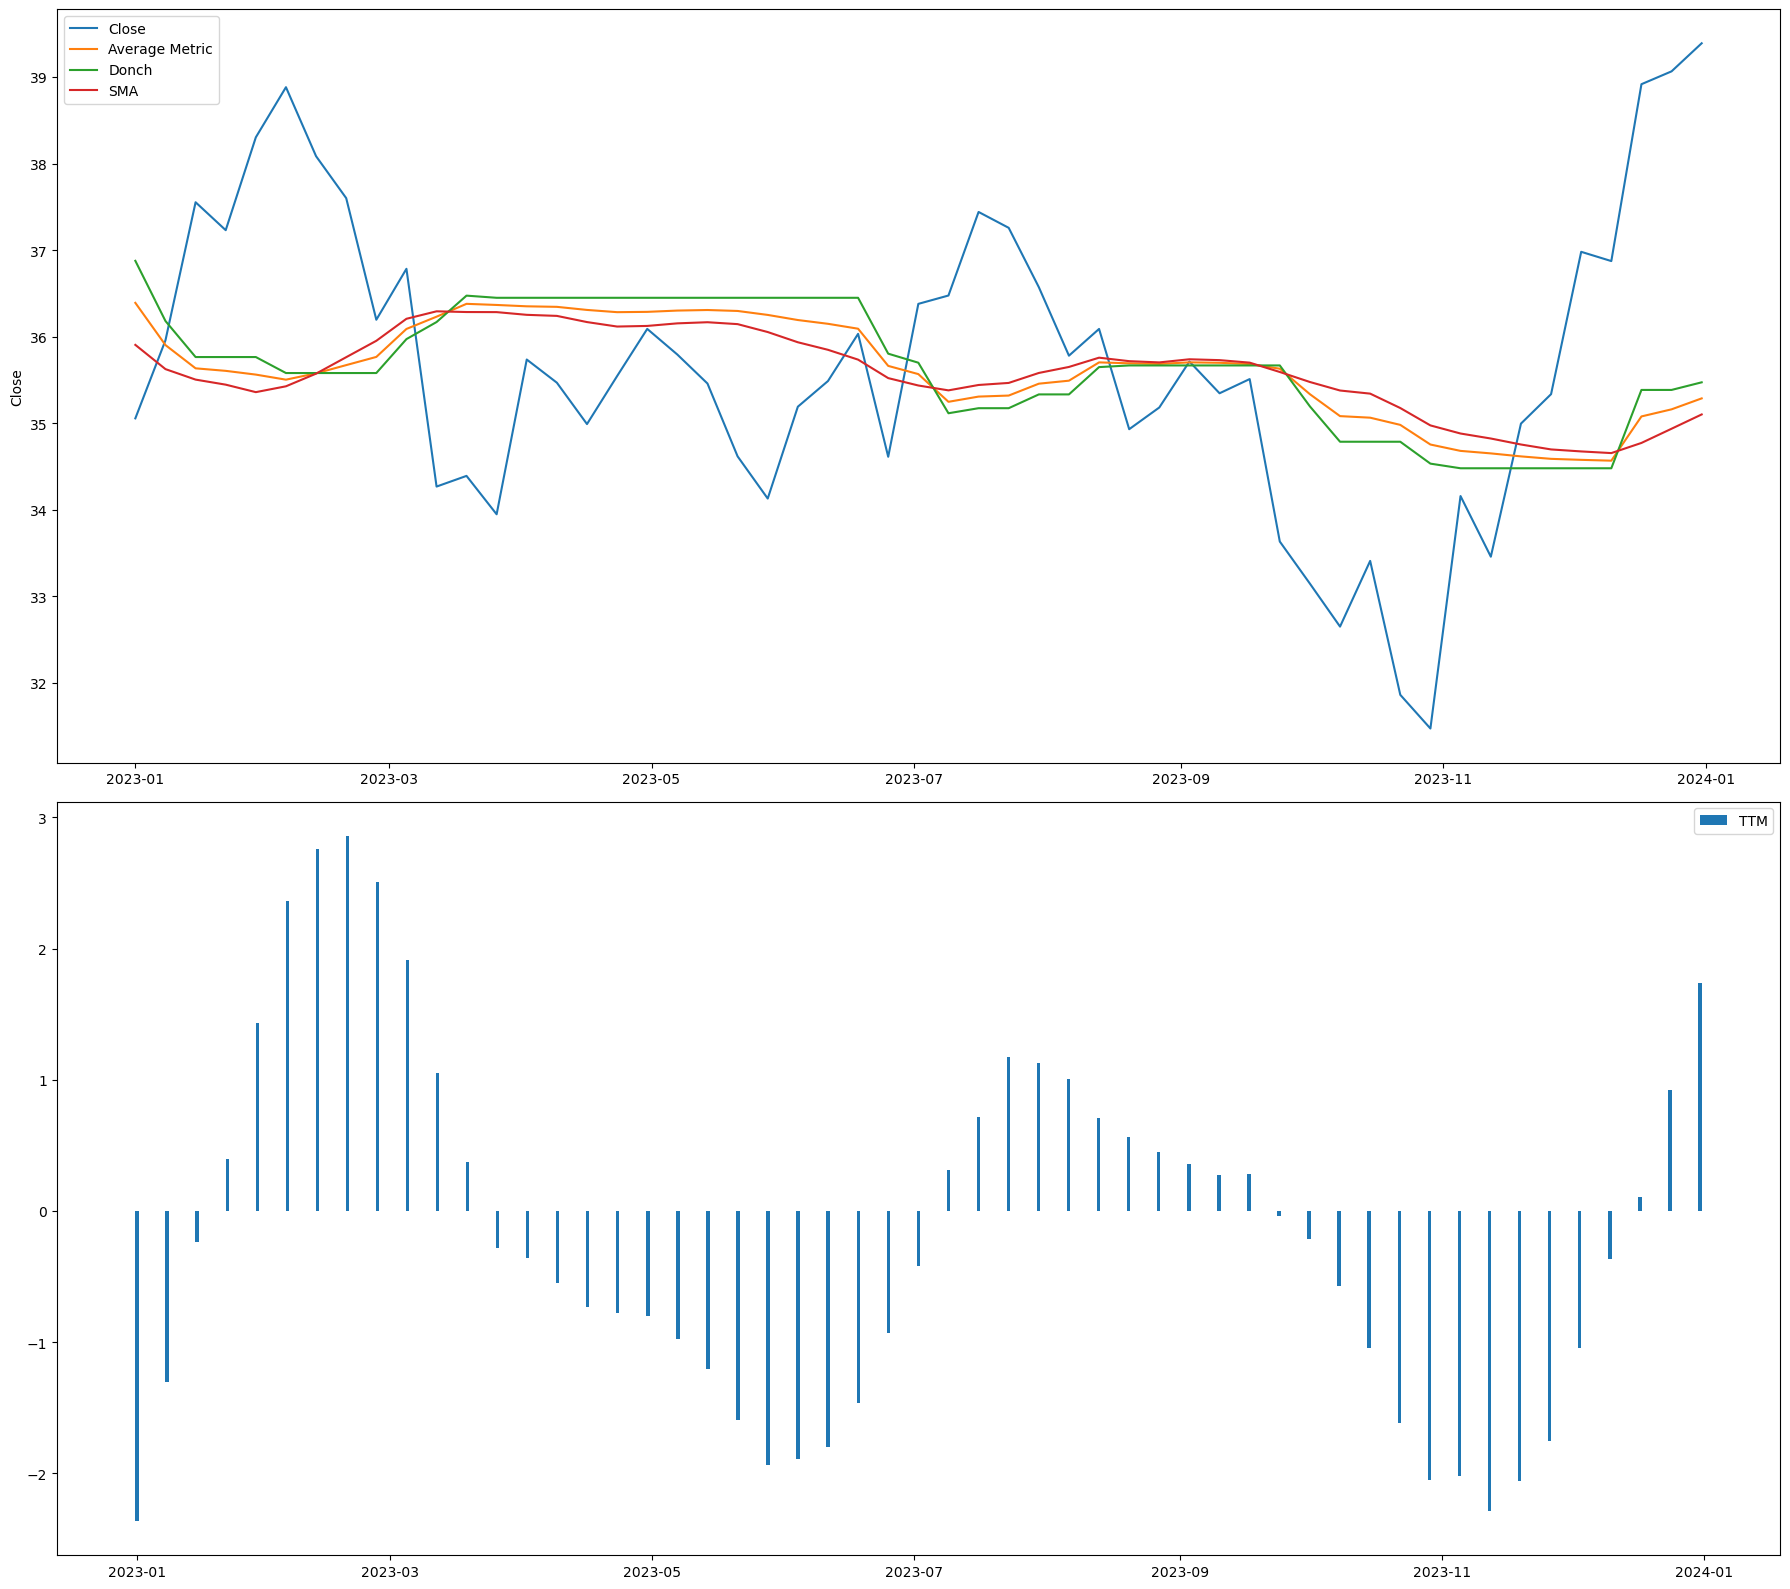

In [124]:
hist=weekly_hist.reset_index()
hist=hist.iloc[20:]
weekly_hist['Date']=pd.to_datetime(weekly_hist['Date'])
weekly_hist['Year']=weekly_hist['Date'].dt.year
weekly_hist=weekly_hist[weekly_hist['Year']==2023]
fig,ax =plt.subplots(2,figsize=(18,16))
ax[1].bar(weekly_hist['Date'],weekly_hist['values'], label='TTM')
ax[0].set_ylabel('Close')
ax[0].plot(weekly_hist['Date'],weekly_hist['Close'], label='Close')
ax[0].plot(weekly_hist['Date'],weekly_hist['metric'],label='Average Metric')
ax[0].plot(weekly_hist['Date'],weekly_hist['donch'], label='Donch')
ax[0].plot(weekly_hist['Date'],weekly_hist['sma'],label='SMA')
                
                     
ax[0].legend()
plt.legend()     
plt.tight_layout()
plt.savefig('TTM_Squeeze_msft.png')
plt.show()

In [ ]:
def atr(data, window):
  """
  Calculates the Average True Range (ATR) for a given window.
  """
  deltas = np.abs(data[1:] - data[:-1])  # High minus Low
  prev_close_deltas = np.abs(data[1:] - data[:-2])  # High minus Previous Close
  low_deltas = np.abs(data[:-1] - data[:-2])  # Low minus Previous Close
  true_range = np.maximum.reduce([deltas, prev_close_deltas, low_deltas], axis=0)
  return np.mean(true_range[-window:])  # Average ATR over the window

def compute_ttm_squeeze(data, window, historical_window=200):
  """
  Calculates the TTM Squeeze for a given data window.
  """
  ttm_squeeze_values = []
  for i in range(window, len(data)):
    current_window = data[i-window:i]
    # Calculate Donchian midpoint, SMA, deltas (as done in your code)
    # ...
    historical_volatility = atr(data, historical_window)
    current_volatility = atr(deltas, window)
    ttm_squeeze_value = current_volatility / historical_volatility
    ttm_squeeze_values.append(ttm_squeeze_value)
  return ttm_squeeze_values

# $\frac{1}{20}\sin\left(x-20\right)+\frac{1}{20}x\cos\left(x-20\right)+\frac{1}{3}$

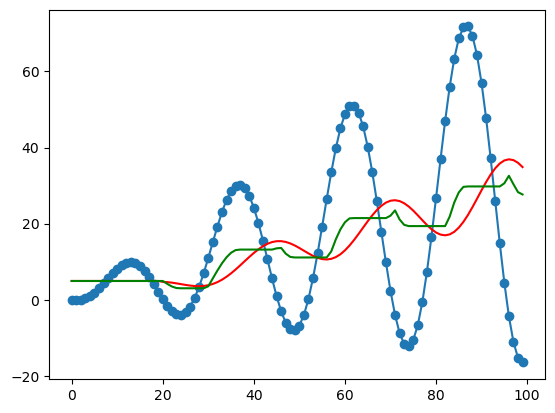

In [87]:
import random
def f(x):
    if x <11:
        return 1/2*x*np.sin(1/4*x-20)+1/3*x
    else:
        return np.mean([1/20*np.sin(1/4*x-20)+1/20*x*np.cos(x-20)+1/3,1/2*x*np.sin(1/4*x-20)+1/3*x])
def g(x):
        return 1/2*x*np.sin(1/4*x-20)+1/3*x

def moving_average(x,period=20):
    L=[]
    L2=[]
    for i in range(len(x)):
        if i<period:
            L.append(np.mean(x[:period]))
            L2.append(np.mean([min(x[:period]),max(x[:period])]))
        else:
            L.append(np.mean(x[i-period:i+1]))
            L2.append(np.mean([min(x[i-period:i+1]),max(x[i-period:i+1])]))
    return L,L2
            
        

y,x=[g(a) for a in range(100)], [b for b in range(100)]
sma,donch=moving_average(y)
lr=LinearRegression()

fig, ax=plt.subplots()
ax.plot(x,y)
ax.plot([i for i in range(len(sma))],sma,color='red')
ax.plot([i for i in range(len(donch))],donch,color='green')
ax.scatter(x=[i for i in range(len(y))],y=[g(i) for i in range(len(y))])
plt.show()


In [53]:
import numpy as np
import pandas as pd

# Set the initial stock price
initial_price = 100

# Set the number of days to simulate
num_days = 252  # One trading year

# Set the expected annual return (e.g., 10%)
expected_return = 0.1

# Set the annual volatility (e.g., 20%)
volatility = 0.2

# Set the time step (daily)
dt = 1 / num_days

# Create a numpy array for the stock prices
prices = np.zeros(num_days)
prices[0] = initial_price

# Create a numpy array for the drift
drift = (expected_return - 1 * volatility ** 2) * dt

# Create a numpy array for the shock
shock = volatility * np.sqrt(dt) * np.random.normal(0, 1, num_days)

# Simulate the stock prices
for i in range(1, num_days):
    prices[i] = prices[i - 1] * np.exp(drift + shock[i])

# Create a pandas DataFrame for the simulated data
simulated_data = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=num_days),
    'Price': prices
})

print(simulated_data.head())

        Date       Price
0 2023-01-01  100.000000
1 2023-01-02  101.473817
2 2023-01-03  101.985558
3 2023-01-04  101.855680
4 2023-01-05  100.026231


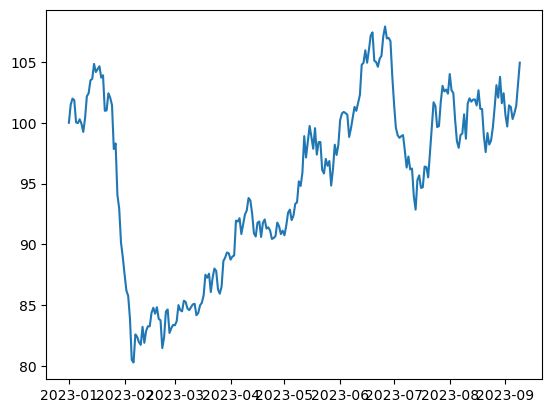

In [54]:
plt.plot(simulated_data['Date'],simulated_data['Price'])